# **COVID-19**
**Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in December 2019 in Wuhan, the capital of China's Hubei province, and has since spread globally, resulting in the ongoing 2019–20 coronavirus pandemic. Common symptoms include fever, cough and shortness of breath. Other symptoms may include fatigue, muscle pain, diarrhoea, sore throat, loss of smell and abdominal pain. While the majority of cases result in mild symptoms, some progress to viral pneumonia and multi-organ failure. As of 13 April 2020, more than 1.8 million cases have been reported in more than 200 countries and territories, resulting in more than 114090 deaths. More than 421497 people have recovered.**

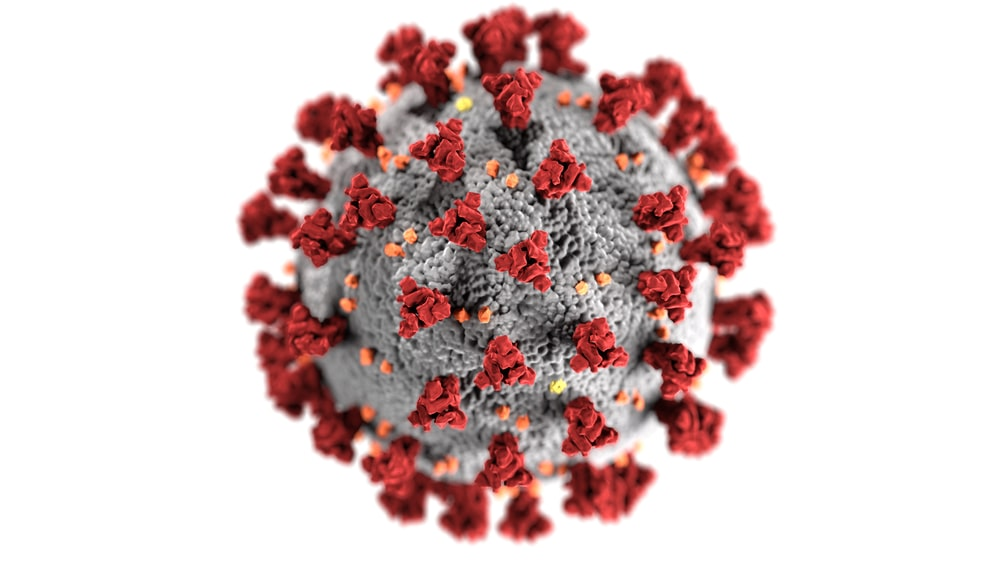

# **Transmission**
* Some details about how the disease is spread are still being determined. The WHO and CDC say it is primarily spread during close contact and by small droplets produced when people cough, sneeze or talk; with close contact being within 1–3 m (3 ft. 3 in–9 ft. 10 in). A study in Singapore found that uncovered coughing can lead to droplets traveling up to 4.5 meters (15 feet). A second study, produced during the 2020 pandemic, found that advice on the distance droplets could travel might be based on old 1930s research which ignored the protective effect and speed of the warm moist outbreath surrounding the droplets; it advised that droplets can travel around 7–8 meters. 

<font color='red'>
    
# **Contents**

    
# **Continent Wise Analysis:**

* Total confirmed cases
* Total death cases
* Total recovered cases    
* Total active cases   
* Mortality rate per 100   
* Covid-19 trend comparison confirm cases in different continents    
* Covid-19 trend comparison of different continents    

# **Visualization on Map:**

* Global Confirmed Cases Heat Map  
* Global Deaths Heat Map

# **Country wise Analysis:**

* Total confirmed cases
* Total death cases
* Total recovered cases
* Total active cases
* Mortality rate per 100
* Different countries death comparison
* Highly affected countries with confirmed cases
* Highly affected countries with active cases
* Highly affected countries with death cases
* Spread Analysis
* Mortality Rate

# **India Case study:**

* Indian map visualization 
* Indian state wise 
* Total confirmed cases
* Total death cases
* Total recovered cases
* Total active cases
* Mortality rate per 100

# **China case Study:**

* China map Visualization
* China State wise
* Total confirmed cases
* Total death cases
* Total recovered cases
* Total active cases
* Mortality rate per 100

# **USA case study:**

* USA map Visualization
* USA State wise
* Total confirmed cases
* Total death cases
* Total recovered cases
* Total active cases
* Mortality rate per 100

# **Prediction Model:**

* Deep Neural Network
 * Confirmed cases
 * Death cases
* Support Vector Machine
 * Confirmed cases
 * Death cases 
</font>

# **Data**

[](http://)
* https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge 
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv 
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv 
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv" 
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'] 
* https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv 


# **Objective**
**The objective of this work is to analyze the confirmed, death, active, recovered cases and mortality rate (per 100) of the different geographical locations of the world.**

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

# **Importing Library**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
!pip install pycountry_convert
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

# **Importing Data**

In [ ]:
df_recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recoveries.head(3)

In [ ]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_covid19.head(3)

In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed.head(3)

In [ ]:
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.head(3)

In [ ]:
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])
df_table.head(3)

In [ ]:
cols = df_confirmed.keys()
confirmed = df_confirmed.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]
recoveries = df_recoveries.loc[:, cols[4]:cols[-1]]

In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    italy_cases.append(df_confirmed[df_confirmed['Country/Region']=='Italy'][i].sum())
    us_cases.append(df_confirmed[df_confirmed['Country/Region']=='US'][i].sum())
    spain_cases.append(df_confirmed[df_confirmed['Country/Region']=='Spain'][i].sum())
    france_cases.append(df_confirmed[df_confirmed['Country/Region']=='France'][i].sum())


# **Importing Pycountry**

In [ ]:
import pycountry
len(pycountry.countries)
list(pycountry.countries)[104]

In [ ]:
len(pycountry.countries)
list(pycountry.countries)[1:]

# **Renaming Columns**

In [ ]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]

# **Changing the conuntry names as required by pycountry convert Lib**

In [ ]:
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"

# **All Countries**

In [ ]:
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])

# **Continents**

In [ ]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [ ]:
# continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

# **Continent Information**

In [ ]:
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])

In [ ]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update', 'Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)
df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)

In [ ]:
df_table = df_table[df_table["continent"] != "Others"]
df_deaths[df_deaths["continent" ]== 'Others']

In [ ]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0')
    plt.title( plt_title,{'fontsize':title_fsize})
    plt.yscale(scale)
    plt.minorticks_on()
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,8))
        # Sub plot
        ax = f.add_subplot(111)
        ax.set_facecolor("black")
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
        ax.set_facecolor("black")
    plt.tight_layout(pad=10, w_pad=10, h_pad=10)
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]  
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["red","green"]
    marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=5, markerfacecolor='#FF6347')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title(" ",{'fontsize':25})
    else:   
        plt.title(" "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = ""#+"output/"

**Total number of Confirmed, Active, death, recovered cases and mortality rate (per 100) accross the globe**


In [ ]:
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Blues',axis=1).format("{:.0f}",subset=["Confirmed"])

# **Tabular Data**

In [ ]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

# **Top Mortality Rate**

In [ ]:
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values("Mortality Rate (per 100)", ascending= False).style.background_gradient(cmap='seismic')


# **Top Countries with confirmed cases**

In [ ]:
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values("Confirmed", ascending= False).style.background_gradient(cmap='seismic')

# **Top Countries with death cases**

In [ ]:
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values("Deaths", ascending= False).style.background_gradient(cmap='seismic')

In [ ]:
f = plt.figure(figsize=(18,8))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed COVID-19)",fontsize=20)
#plt.grid(alpha=0.3)
plt.savefig(out+'Top 10 Countries (Confirmed Cases).png')

In [ ]:
f = plt.figure(figsize=(18,8))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Highly affected Countries (COVID-19 Deaths)",fontsize=20)
#plt.grid(alpha=0.3,which='both')
plt.savefig(out+'Top 10 Countries (Deaths Cases).png')

In [ ]:
f = plt.figure(figsize=(18,8))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.bar(df_countries_cases.sort_values('Active')["Active"].index[-10:],df_countries_cases.sort_values('Active')["Active"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Highly affected Countries (Active COVID-19)",fontsize=20)
plt.savefig(out+'Top 10 Countries (Active Cases).png')

# **Global Heat Map**

In [ ]:
temp_df = pd.DataFrame(df_countries_cases['Confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",color=np.log10(temp_df.iloc[:,-1]),hover_name="country",hover_data=["Confirmed"],color_continuous_scale=px.colors.sequential.Mint,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="Blues")
fig.show()

In [ ]:
temp_df = pd.DataFrame(df_countries_cases['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",color=np.log10(temp_df["Deaths"]),hover_name="country",hover_data=["Deaths"],color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Death Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Deaths Cases(Log Scale)",colorscale="Blues")
fig.show()

# **Global Progression Spred of COVID-19**

In [ ]:
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index()
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="Country_Region", locationmode='country names',color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.3)-1, hover_name="Country_Region",hover_data=["Confirmed"],range_color= [0, max(np.power(df_data["Confirmed"],0.3))], projection="natural earth", animation_frame="Last_Update", 
                     color_continuous_scale=px.colors.sequential.Plasma,title='COVID-19: Progression of spread')
fig.update_coloraxes(colorscale="rainbow")
fig.update(layout_coloraxis_showscale=False)
fig.show()

# **Spraed of COVID-19**

* The following graph indicates the spread of COVID-19 from 22nd Jan increased linearly till the last of Jan then the curve remains flattened around 25th of Feb. After that, the affected no of countries increased linearly to reach around 160 countries. Then it seems to be slow down.    

In [ ]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="blue",linewidth=5, linestyle='-')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 20)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])
#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries",fontsize=18)

plt.savefig(out+'spread.png')
plt.show()
plt.close()

# **COVID-19 Visualization of Different Countries**

* The total number of affected countries across the globe is more than 206 till Dt. 13.04.2020. 
* The USA has the most Confirmed cases whereas Italy has the highest number of deaths. China has the biggest number of recovered patients.
* Italy which is a country of European continent though it has the second number of active cases the mortality rate is high among all highly affected countries.


In [ ]:
df_countries = df_confirmed.groupby(["country"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = True)
countries = df_countries[df_countries[df_countries.columns[-1]] >= 1200].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])

plt.show()

# **COVID-19 Visualization of Different Continents**

**As we know this been a pandemic for the world we can easily conclude that the Covid-19 has not been limited to a certain continent.** 

In [ ]:
df_continent = df_confirmed.groupby(["continent"]).sum()

df_continent = df_continent.sort_values(df_continent.columns[-1],ascending = False)
continent = df_continent[df_continent[df_continent.columns[-1]] >= 100].index

cols = 2
rows = int(np.ceil(continent.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for j,continent in enumerate(continent):
    visualize_covid_cases(df_confirmed, df_deaths,continent = continent,figure = [f,rows,cols, j+1])

plt.show()

# **Mortality Rate Curve of Different Continents**

* We can clearly see that mortality rate of different continents varies. The high mortality is found in Europe where as low mortality rate is in Australia. It seems to be the mortality rate of whole world is increasing day by day.  

In [ ]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
continents = ["All"]+list(continents)

cols =2
#rows = 2
axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","Mortality Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
ax.set_facecolor("black")
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]))

plt_title = "COVID-19: World Mortality Rate Curve"
plot_params(ax,axis_label,plt_title)
# Legend Location
l = plt.legend(loc= "best")


#SubPlot 2
ax = f.add_subplot(212)
for i, continent in enumerate(continents[1:]):
    mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continent)
#     mortality_rate = mortality_rate.replace(np.nan, 0, regex=True)
    plt.plot(np.arange(1+mortality_rate[mortality_rate == 0].shape[0],mortality_rate[mortality_rate == 0].shape[0]+mortality_rate[mortality_rate > 0].shape[0]+1),mortality_rate[mortality_rate > 0],label = continents[i+1]+" "+str(mortality_rate[-1]))

plt_title = "COVID-19: Mortality Rate Curve for all Continents"
plot_params(ax,axis_label,plt_title)

# Legend Location
l = plt.legend(loc= "best")
ax.set_facecolor("black")

plt.minorticks_on()
plt.savefig(out+'Mortality rate.png')
plt.show()

# **Tabular Data**

* Europe has the highest number of cases across the globe. 
* This shows the disease causes in all cases except the mortality rate is more in North America whereas South America's very less significant number is compared to North America even if the geographical location is very near to North America. But The mortality rate in SA is 4.14 percent which is lgreater than NA.
* Asia continent which is the origin of COVID-19 has third-highest numbers in all cases except mortality rate.
* Africa continent has fewer cases compared to other continents but the mortality rate is 5.44% which shows not a good sign that comes in the second number. 
* Australia which is far away from other continents has less affected cases compared to other continents


In [ ]:
df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
.background_gradient(cmap='Reds',subset=["Deaths"])\
.background_gradient(cmap='Greens',subset=["Recovered"])\
.background_gradient(cmap='Purples',subset=["Active"])\
.background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])
df_continents_cases.sort_values("Mortality Rate (per 100)", ascending= False).style.background_gradient(cmap='Reds')


# **confirmed COVID-19 Trend Comparision with India**

In [ ]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)
threshold = 50
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)
ax.set_facecolor("black")
for i,country in enumerate(temp.index):
    if i >=9 :
        if country != "India" and country != "Japan" :
            continue
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,'->',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='.',markersize=10, markerfacecolor='#FFFFFF')
        plt.plot(date,t,"-.",label = country,**marker_style)
plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title(" Confirmed cases Comparison of Different Countries and India ",fontsize=20)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.savefig(out+'Trend Comparison with India (confirmed).png')
plt.show()

# **COVID-19 Deaths Trend Comparison of countries**

In [ ]:
temp = df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)
threshold = 100
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)
ax.set_facecolor("black")
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 40
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]    
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'->',label = country,linewidth =4, markevery=[-1])
plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Different Countries Deaths Comparision",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
#plt.grid(which="both")
plt.savefig(out+'Trend Comparison countries deaths.png')
plt.show()

# **COVID-19 Confirmed cases Trend Comparison of Different Continents**

In [ ]:
temp = df_confirmed.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)
threshold = 50
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)
ax.set_facecolor("black")
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'->',label = country,linewidth =4, markevery=[-1])
    plt.text(0.5, 3., "serif", label = country)
plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("COVID-19 confirmed cases in different  continents",fontsize=20)
plt.legend(loc = "upper left")
plt.yscale("log")
#plt.grid(which="both")
plt.savefig(out+'Trend Comparison of continents (Confirmed).png')
plt.show()

# **COVID-19 Deaths Trend Comparison of Different Continents** 

In [ ]:
temp = df_deaths.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)
threshold = 10
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)
ax.set_facecolor("black")
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 10)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'->',label = country,linewidth =4, markevery=[-1])
plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
#plt.grid(which="both")
plt.savefig(out+'Trend Comparison continents (deaths).png')
plt.show()

# **COVID-19 India Case Study**

* A total of 31 Indian states and union territories has been affected by COVID-19. The mortality rate is 3.59% whereas in Asia the number is 3.68%. It might increase with the increase in the number of cases. 

In [ ]:

df_india_test = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data']).rename(columns = {"totalIndividualsTested":"c_individualtest",
                                                                                                                                                    "totalPositiveCases":"c_positive","totalSamplesTested":"c_tests"})

In [ ]:
df_india_test["p2t_ratio"]= np.round(100*df_india_test["c_positive"]/df_india_test["c_tests"],2)
df_india_test["positive"] = df_india_test["c_positive"].diff()
df_india_test["tests"] = df_india_test["c_tests"].diff()
df_india_test["p2t_ratio"]= np.round(100*df_india_test["positive"]/df_india_test["tests"],2)
df_india_test = df_india_test[1:]

In [ ]:
f = plt.figure(figsize=(20,5))
f.add_subplot(111)

plt.axes(axisbelow= False)
plt.bar(df_india_test["day"],df_india_test["tests"].values[:],color="blue",label="Negetive"+str())
plt.bar(df_india_test["day"],df_india_test["positive"].values[:],bottom=df_india_test["tests"].values[:]-df_india_test["positive"].values[:],color="black",label="Positive")
plt.tick_params(size=5,labelsize = 13)
plt.tick_params(axis="x",size=5,labelsize = 13,labelrotation=60 )
plt.xlabel("Date",fontsize=18)
plt.ylabel("Test Results",fontsize=18)

plt.title("Tests in India",fontsize=20)
#plt.grid(alpha=0.3)
plt.legend()
plt.savefig(out+'Test_India.png')

# **Cases In India**

In [ ]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [ ]:
total = df_india.sum()
total.name = "Total"
df_t = pd.DataFrame(total,dtype=float).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["deaths"]/df_t["confirmed"],2)
df_t.style.background_gradient(cmap='Reds',axis=1)

# **Indian States**

In [ ]:
f = plt.figure(figsize=(18,8))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_india.sort_values('confirmed')["confirmed"].index[-10:],df_india.sort_values('confirmed')["confirmed"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: India (Confirmed Cases)",fontsize=20)
plt.savefig(out+'Top 10 States_India (Confirmed Cases).png')

In [ ]:
f = plt.figure(figsize=(18,8))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.bar(df_india.sort_values('deaths')["deaths"].index[-10:],df_india.sort_values('deaths')["deaths"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: India (Deaths Cases)",fontsize=20)
plt.savefig(out+'Top 10 States_India (Deaths Cases).png')

In [ ]:
locations = {
    "Kerala" : [10.8505,76.2711],"Maharashtra" : [19.7515,75.7139],"Karnataka": [15.3173,75.7139],"Telangana": [18.1124,79.0193],"Uttar Pradesh": [26.8467,80.9462],"Rajasthan": [27.0238,74.2179],"Gujarat":[22.2587,71.1924],"Delhi" : [28.7041,77.1025],"Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],"Haryana": [29.0588,76.0856],"Madhya Pradesh":[22.9734,78.6569],"Jammu and Kashmir":[33.7782,76.5762],"Ladakh": [34.1526,77.5770],"Andhra Pradesh":[15.9129,79.7400],"West Bengal": [22.9868,87.8550],"Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],"Chandigarh":[30.7333,76.7794],"Uttarakhand":[30.0668,79.0193],"Himachal Pradesh":[31.1048,77.1734],"Goa": [15.2993,74.1240],"Odisha":[20.9517,85.0985],"Andaman and Nicobar Islands": [11.7401,92.6586],"Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],"Mizoram":[23.1645,92.9376],"Assam":[26.2006,92.9376],"Meghalaya":[25.4670,91.3662],"Tripura":[23.9408,91.9882],"Arunachal Pradesh":[28.2180,94.7278],"Jharkhand" : [23.6102,85.2799],"Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],"Dadra and Nagar Haveli":[20.1809,73.0169],"Lakshadweep":[10.5667,72.6417],"Daman and Diu":[20.4283,72.8397]}
df_india["Lat"] = ""
df_india["Long"] = ""
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]

# **Affected Regions of India**

In [ ]:
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%",tiles = 'Stamen Toner')
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:15px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*15000,
        color='	#0000FF',
        fill_color='red',
        fill_opacity=0.9,
        fill=True).add_to(india)
india

* In India mortality rate also varies in different geographical locations. The highest mortality rate of state Jharkhand  is 10% though the number of cases is very less. If we consider Maharastra which has the highest number of cases. The mortality rate is 5%. Odisha holds the 12th position in terms of mortality rate.

In [ ]:
df_india["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["deaths"]/df_india["confirmed"]),2)
df_india.sort_values("Mortality Rate (per 100)", ascending= False).style.background_gradient(cmap='Blues',subset=["confirmed"])\
.background_gradient(cmap='Reds',subset=["deaths"])\
.background_gradient(cmap='Greens',subset=["recovered"])\
.background_gradient(cmap='Purples',subset=["active"])\
.background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

# **USA Case Study**
* The USA is the most affected country of COVID-19. The number of cases is increasing rapidly. The mortality rate is also adding more numbers to it. The most affected state in the USA is New York. The mortality rate is also high among all states in the USA.

In [ ]:
date_usa = datetime.strptime(df_confirmed.columns[-1],'%m/%d/%y').strftime("%m-%d-%Y")
df_temp = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+date_usa+".csv")
df_usa = df_temp.loc[df_temp["Country_Region"]== "US"]
df_usa = df_usa.rename(columns={"Admin2":"County"})

In [ ]:
total = df_usa.sum()
total.name = "Total"
total["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*total["Deaths"]/total["Confirmed"]),2)
pd.DataFrame(total).transpose().loc[:,["Confirmed","Deaths", "Mortality Rate (per 100)"]].style.background_gradient(cmap='Reds',axis=1)

In [ ]:
df_usa["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_usa["Deaths"]/df_usa["Confirmed"]),2)
df_usa.loc[:,["Province_State","Confirmed","Deaths","County","Mortality Rate (per 100)"]].sort_values("Confirmed",ascending=False).set_index("County")[:15].style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
.background_gradient(cmap='Blues',subset=["Mortality Rate (per 100)"])

# **Most Affected States in USA**

In [ ]:
f = plt.figure(figsize=(16,5))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.bar(df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Confirmed')["Confirmed"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases)",fontsize=20)
plt.savefig(out+'Top 10 States_USA (Confirmed Cases).png')

In [ ]:
f = plt.figure(figsize=(16,5))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.bar(df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].index[-10:],df_usa.groupby(["Province_State"]).sum().sort_values('Deaths')["Deaths"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: USA (Deaths Cases)",fontsize=20)
plt.savefig(out+'Top 10 States_USA (Deaths Cases).png')

# **USA Map visualization**

In [ ]:
df_usa = df_usa.replace(np.nan, 0, regex=True)
usa = folium.Map(location=[37, -102], zoom_start=4,max_zoom=8,min_zoom=4,tiles = 'Stamen Toner')
for i in np.int32(np.asarray(df_usa[df_usa['Confirmed'] > 0].index)):
    folium.Circle(
        location=[df_usa.loc[i]['Lat'], df_usa.loc[i]['Long_']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_usa.loc[i]['Province_State']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_usa.loc[i]['County']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_usa.loc[i]['Confirmed'])+"</li>"+
        "<li>Active:   "+str(df_usa.loc[i]['Active'])+"</li>"+
        "<li>Recovered:   "+str(df_usa.loc[i]['Recovered'])+"</li>"+       
        "<li>Deaths:   "+str(df_usa.loc[i]['Deaths'])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_usa.loc[i]['Deaths']/(df_usa.loc[i]['Confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=int((np.log2(df_usa.loc[i]['Confirmed']+1))*6000),
        color='blue',
        fill_color='red',
        fill_opacity=0.7,
        fill=True).add_to(usa)

usa

In [ ]:
state_geo = requests.get('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json').json()
county_geo = requests.get('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us_counties_20m_topo.json').json()


In [ ]:
data_temp = df_usa.groupby(["Province_State"]).sum().reset_index().drop(["Lat","Long_"],axis=1)
data_temp["Confirmed_log"] = np.log10(data_temp["Confirmed"]+1)
bins = list(data_temp['Confirmed_log'].quantile([0, 0.25, 0.5, 0.75,0.95 ,1]))
m = folium.Map(location=[37, -102], zoom_start=4,max_zoom=6,min_zoom=3, tiles = 'Stamen Toner')
 
# Add the color for the chloropleth:
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data = data_temp,
    columns=['Province_State', 'Confirmed_log'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins = bins,
    reset=True,
    legend_name='Confirmed cases log (10^x)'
).add_to(m)
folium.LayerControl().add_to(m)
m

# **China Case Study**

In [ ]:
df_temp = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv")
df_china = df_temp.loc[df_temp["Country_Region"]== "China"]
df_china = df_china.rename(columns={"Admin2":"County"})
total = df_china.sum()
total.name = "Total"
total["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*total["Deaths"]/total["Confirmed"]),2)
pd.DataFrame(total).transpose().loc[:,["Confirmed","Deaths","Mortality Rate (per 100)"]].style.background_gradient(cmap='Purple',axis=1)

In [ ]:
df_china["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_china["Deaths"]/df_china["Confirmed"]),2)
df_china.loc[:,["Confirmed","Deaths","Province_State","Mortality Rate (per 100)"]].groupby(["Province_State"]).sum().sort_values("Mortality Rate (per 100)",ascending=False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
.background_gradient(cmap='Reds',subset=["Deaths"])\
.background_gradient(cmap='Blues',subset=["Mortality Rate (per 100)"])
#df_china.sort_values("Mortality Rate (per 100)", ascending= False).style.background_gradient(cmap='seismic')

In [ ]:
df_china = df_china.replace(np.nan, 0, regex=True)
china = folium.Map(location=[35, 104], zoom_start=4,max_zoom=8,min_zoom=4,tiles='Stamen Toner')
for i in np.int32(np.asarray(df_china[df_china['Confirmed'] > 0].index)):
    folium.Circle(
        location=[df_china.loc[i]['Lat'], df_china.loc[i]['Long_']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_china.loc[i]['Province_State']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_china.loc[i]['County']))+"</div>"+
                    "<hr style='margin:50px;'>"+
                    "<ul style='color: #4444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_china.loc[i]['Confirmed'])+"</li>"+
        "<li>Active:   "+str(df_china.loc[i]['Active'])+"</li>"+
        "<li>Recovered:   "+str(df_china.loc[i]['Recovered'])+"</li>"+       
        "<li>Deaths:   "+str(df_china.loc[i]['Deaths'])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_china.loc[i]['Deaths']/(df_china.loc[i]['Confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=int((np.log2(df_china.loc[i]['Confirmed']+1))*6000),
        color='#0000FF',
        fill_color='red',fill_opacity=0.8,
        fill=True).add_to(china)

china

# **China and Rest of the World**

In [ ]:
df_confirmed_report = df_confirmed.copy()
df_confirmed_report.loc[df_confirmed_report['country'] != "China","country"] = "Outside China"
df_confirmed_report = df_confirmed_report.groupby("country").sum().drop(["Lat","Long"],axis =1)
df_confirmed_report.loc["Total"] = df_confirmed_report.sum()
df_confirmed_newcases = df_confirmed_report.groupby(level =0).diff(axis =1)
df_confirmed_newcases = df_confirmed_newcases.replace(np.nan, 0, regex=True) 
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(111)
ax1.set_facecolor('black')

ax1.bar(df_confirmed_report[df_confirmed_report.index == "China"].columns,df_confirmed_newcases[df_confirmed_newcases.index == "China"].values[0], label = "China (New)",color='dodgerblue')
ax1.bar(df_confirmed_report[df_confirmed_report.index == "Outside China"].columns,df_confirmed_newcases[df_confirmed_newcases.index == "Outside China"].values[0],bottom=df_confirmed_newcases[df_confirmed_newcases.index == "China"].values[0],label = "Outside China (New)",color='white')

# Labels
ax1.set_xlabel("Dates",fontsize=17)
ax1.set_ylabel("New Cases Reported",fontsize =17)

ax1.tick_params(size=5,labelsize=9)
ax1.set_xticks(np.arange(0.5, len(df_confirmed_report.columns), 6))
ax1.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_report.columns][::6],fontsize=15)
l = np.arange(0, df_confirmed_report.max(axis = 1)[2]/10+10000, 5000)
ax1.set_yticks(l[::int(len(l)/5)])
# ax1.spines['bottom'].set_position('zero')

ax2 = ax1.twinx()
marker_style = dict(linewidth=3, linestyle='-', marker='.',markersize=5, markerfacecolor='#ffffff')

ax2.plot(df_confirmed_report[df_confirmed_report.index == "Total"].columns ,df_confirmed_report[df_confirmed_report.index == "Total"].values[0],**marker_style,label = "World Total (Cumulative)",color="darkorange",clip_on=False)
ax2.plot(df_confirmed_report[df_confirmed_report.index == "China"].columns ,df_confirmed_report[df_confirmed_report.index == "China"].values[0],**marker_style,label = "China (Cumulative)",color="red",clip_on=False)
ax2.plot(df_confirmed_report[df_confirmed_report.index == "Outside China"].columns ,df_confirmed_report[df_confirmed_report.index == "Outside China"].values[0],**marker_style,label ="Outside China (Cumulative)",color="darkviolet",clip_on=False)
ax2.bar([0],[0])

# Label
ax2.tick_params(labelsize=15)
ax2.set_ylabel("Cumulative",fontsize =17)
ax2.set_xticks(np.arange(0.5, len(df_confirmed_report.columns), 6))
ax2.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_report.columns][::6])
l = np.arange(0, df_confirmed_report.max(axis = 1)[2]+100000, 100000)
ax2.set_yticks(l[::int(len(l)/5)])

f.tight_layout()
f.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Confirmed Cases: China Vs Rest of the World",fontsize = 22)
plt.savefig(out+'China vs Rest of the world.png')
plt.show()

In [ ]:
df_deaths_report = df_deaths.copy()
df_deaths_report.loc[df_deaths_report['country'] != "China","country"] = "Outside China"
df_deaths_report = df_deaths_report.groupby("country").sum().drop(["Lat","Long"],axis =1)
df_deaths_report.loc["Total"] = df_deaths_report.sum()
df_deaths_newcases = df_deaths_report.groupby(level =0).diff(axis =1)
df_deaths_newcases = df_deaths_newcases.replace(np.nan, 0, regex=True)

f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(111)
ax1.set_facecolor('black')

ax1.bar(df_deaths_report[df_deaths_report.index == "China"].columns,df_deaths_newcases[df_deaths_newcases.index == "China"].values[0], label = "China (New)",color='dodgerblue')
ax1.bar(df_deaths_report[df_deaths_report.index == "Outside China"].columns,df_deaths_newcases[df_deaths_newcases.index == "Outside China"].values[0],bottom=df_deaths_newcases[df_deaths_newcases.index == "China"].values[0],label = "Outside China (New)",color='white')

# Labels
ax1.set_xlabel("Dates",fontsize=17)
ax1.set_ylabel("New Cases Reported",fontsize =17)

ax1.tick_params(size=10,labelsize=15)
ax1.set_xticks(np.arange(0.5, len(df_deaths_report.columns), 6))
ax1.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_deaths_report.columns][::6],fontsize=15)
l = np.arange(0, df_deaths_report.max(axis = 1)[2]/10+500, 500)
ax1.set_yticks(l[::int(len(l)/5)])
ax1.spines['bottom'].set_position('zero')

ax2 = ax1.twinx()
marker_style = dict(linewidth=3, linestyle='-', marker='.',markersize=5, markerfacecolor='#ffffff')

ax2.plot(df_deaths_report[df_deaths_report.index == "Total"].columns ,df_deaths_report[df_deaths_report.index == "Total"].values[0],**marker_style,label = "World Total (Cumulative)",color="darkorange",clip_on=False)
ax2.plot(df_deaths_report[df_deaths_report.index == "China"].columns ,df_deaths_report[df_deaths_report.index == "China"].values[0],**marker_style,label = "China (Cumulative)",color="red",clip_on=False)
ax2.plot(df_deaths_report[df_deaths_report.index == "Outside China"].columns ,df_deaths_report[df_deaths_report.index == "Outside China"].values[0],**marker_style,label ="Outsdte China (Cumulative)",color="darkviolet",clip_on=False)
ax2.bar([0],[0])

# Label
ax2.tick_params(labelsize=15)
ax2.set_ylabel("Cumulative",fontsize =17)
ax2.set_xticks(np.arange(0.5, len(df_deaths_report.columns), 6))
ax2.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_deaths_report.columns][::6])
l = np.arange(0, df_deaths_report.max(axis = 1)[2]+4000, 2000)
ax2.set_yticks(l[::int(len(l)/5)])

f.tight_layout()
f.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Deaths Reported: China Vs Rest of the World",fontsize = 22)
plt.savefig(out+'China vs Rest of the world1.png')
plt.show()

# **Global Confirmed cases Prediction**

* A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers.
* The DNN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship. 
* The network moves through the layers calculating the probability of each output. For example, a DNN that is trained to recognize dog breeds will go over the given image and calculate the probability that the dog in the image is a certain breed. 
* The user can review the results and select which probabilities the network should display (above a certain threshold, etc.) and return the proposed label. Each mathematical manipulation as such is considered a layer, and complex DNN have many layers, hence the name "deep" networks.
* In this work DNN is used to predict the increasing number of cases and confirmed deaths over time. 

In [ ]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(100,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Dense_l2 = Dense(100,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
model = models.Model(inputs=Visible, outputs=LRelu_l3)
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model.summary()

In [ ]:
data_y = np.log10(np.asarray(df_confirmed.sum()[5:]).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

In [ ]:
epochs = 600
model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs=epochs)

In [ ]:
model.save('model_confirmed.h5')

In [ ]:
model = models.load_model("model_confirmed.h5")
model.summary()

In [ ]:
lakh = 100000
prediction_days = 10
data = np.power(10,model.predict(np.arange(1,len(data_y)+prediction_days+1)))
temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(15,10))
#ax = f.set_facecolor('black')
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
# plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
# plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Lakh)",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig(out+"Prediction Curve-Confirmed.png")
plt.show()

# **Prediction Curve for Global Death Cases**


In [ ]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
model2 = models.Model(inputs=Visible, outputs=LRelu_l3)
model2.compile(optimizer=Adam(lr=0.0001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model2.summary()

In [ ]:
data1_y = np.log10(np.asarray(df_deaths.sum()[5:-1]).astype("float32"))
data1_x = np.arange(1,len(data_y))

In [ ]:
epochs=2000
model2.fit(data1_x.reshape([data1_y.shape[0],1]),data1_y.reshape([data1_y.shape[0],1]),epochs=epochs)

In [ ]:
model2.save('model_1.h5')

In [ ]:
model2 = models.load_model("model_1.h5")
model2.summary()

In [ ]:
thousand = 1000
prediction_days = 10
data = np.power(10,model2.predict(np.arange(1,len(data_y)+prediction_days+1)))
temp_data = df_deaths.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))
# xnew = np.linspace(date.min(), date.max(), 10)
# spl = make_interp_spline(date, t, k=1)  # type: BSpline
# power_smooth = spl(xnew)

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/thousand,"-.",color="maroon",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/thousand,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-1)[0]/thousand)+"K\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
#plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
#plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Deaths Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Deaths Cases (Thousand)",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig(out+"Prediction Curve2.png")
plt.show()

In [ ]:
import datetime
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]
#Convert integer into datetime

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# **Tarining the data**

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.10, shuffle=False) 

In [ ]:
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.10, shuffle=False) 

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.10, shuffle=False) 

# **Support Vector Machine**
* SVM algorithm is used for supervised machine learning that is both for data classification and regression analysis. It classifies efficiently both linear and nonlinearly separable data by creating a hyperplane for data in the original space. The dot product of hyperplane with a vector is constant in that space. The hyperplane can be represented as 
w ⃗.x ⃗-b=0                              
* Where, w is considered as a normalized vector to the hyperplane, x set of points and b/(||w||) can be calculated by the equation of distance from a point to a plane. If the data points are linearly separable then by taking two parallel hyperplanes having distance between them is as much as possible. The bounded region is called the margin. It indicates the data points belong to either class of the data.


In [ ]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)

f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
ax.set_facecolor("black")
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
plt.savefig(out+"Prediction confirmed SVM.png")
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))


In [ ]:
# Future predictions using SVM 
print('SVM conf classes predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

In [ ]:
# svm_deaths = svm_search.best_estimator_
svm_deaths = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_deaths.fit(X_train_deaths, y_train_deaths)
svm_pred_death = svm_deaths.predict(future_forcast)

# check against testing data
svm_test_pred = svm_deaths.predict(X_test_deaths)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
ax.set_facecolor("black")
plt.plot(y_test_deaths)
plt.plot(svm_test_pred)
plt.legend(['Test Data', ' Death Predictions'])
plt.savefig(out+"Prediction Death SVM.png")
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))


In [ ]:
# Future predictions using SVM 
print('SVM death classes predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred_death[-10:])))

# **Remark**

* **The mortality rate of COVID-19 varies in different geographical locations.**
* If we compare three countries India, China, and the USA. China has the highest mortality rate of 4.03 which comes under continent Asia. Asia comes in 5th position in terms of mortality rate i.e. 3.69.
* The most affected country the USA has a mortality rate of 3.97 which is a country in North America. North America has a mortality rate of 3.05 which holds the 4th position.
* India has the less number of mortality rate compared to china and USA i.e 3.59
* If the cases grow in this way the world will face new confirmed cases next week is near about 2.5 million whereas the death cases will grow to 2.5 lacks. And the mortality rate will become 10 per 100 people.


